<a href="https://colab.research.google.com/github/fatasa/TeksMining/blob/main/TM_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library
import pandas as pd
import numpy as np
import re
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# import dataset
def load_dataset():
  dataset = pd.read_csv('amazon_alexa.csv')
  dataset = dataset.loc[:, ::-1]
  dataset = dataset.rename(columns={' rating':'rating'})
  return dataset

data = load_dataset()
data.head()

,feedback,verified_reviews,variation,date,rating
0,1,Love my Echo!,Charcoal Fabric,31-Jul-18,5
1,1,Loved it!,Charcoal Fabric,31-Jul-18,5
2,1,"Sometimes while playing a game, you can answer...",Walnut Finish,31-Jul-18,4
3,1,I have had a lot of fun with this thing. My 4 ...,Charcoal Fabric,31-Jul-18,5
4,1,Music,Charcoal Fabric,31-Jul-18,5


In [3]:
# mengambil data hanya verified_reviews dan rating
data = pd.DataFrame(data[['verified_reviews', 'rating']]);
data.head()

,verified_reviews,rating
0,Love my Echo!,5
1,Loved it!,5
2,"Sometimes while playing a game, you can answer...",4
3,I have had a lot of fun with this thing. My 4 ...,5
4,Music,5


In [4]:
data.shape

(3150, 2)

In [5]:
# hapus data kosong
data.dropna(inplace=True)
# mendeteksi keberadaan nilai kosong
data.isna().values.any()

False

In [6]:
# hapus duplikasi data
data.drop_duplicates(inplace=True)
# hitung jumlah duplikasi data
data.duplicated().value_counts()

False    2315
dtype: int64

In [7]:
data.shape

(2315, 2)

In [8]:
data.head()

,verified_reviews,rating
0,Love my Echo!,5
1,Loved it!,5
2,"Sometimes while playing a game, you can answer...",4
3,I have had a lot of fun with this thing. My 4 ...,5
4,Music,5


# PELABELAN DATA

In [9]:
# pelabelan data
label = []
for index, row in data.iterrows():
    if row["rating"] == 5 or row["rating"] == 4:
        label.append('positif')
    elif row["rating"] == 3:
        label.append('netral')
    else:
        label.append('negatif')

data["label"] = label

data.head()

,verified_reviews,rating,label
0,Love my Echo!,5,positif
1,Loved it!,5,positif
2,"Sometimes while playing a game, you can answer...",4,positif
3,I have had a lot of fun with this thing. My 4 ...,5,positif
4,Music,5,positif


In [10]:
# mengambil data hanya verified_reviews dan label
data = pd.DataFrame(data[['verified_reviews', 'label']]);
data = data.loc[:, ::-1]
data.head()

,label,verified_reviews
0,positif,Love my Echo!
1,positif,Loved it!
2,positif,"Sometimes while playing a game, you can answer..."
3,positif,I have had a lot of fun with this thing. My 4 ...
4,positif,Music


In [11]:
data['label'].value_counts()

positif    2000
negatif     208
netral      107
Name: label, dtype: int64

Text(0.5, 1.0, 'Dataset labels distribuition')

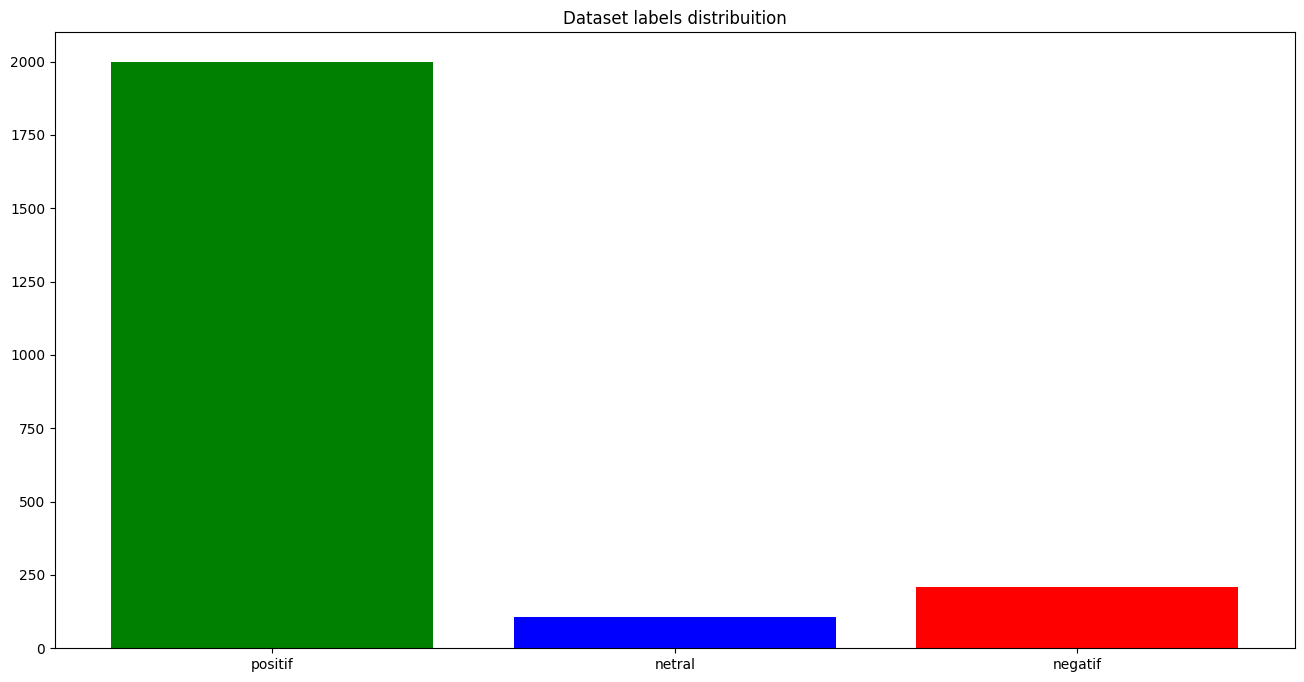

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

label_cnt = Counter(data.label)
plt.figure(figsize=(16,8))
plt.bar(label_cnt.keys(), label_cnt.values(), color = ["green", "blue", "red"])
plt.title("Dataset labels distribuition")

# PREPROCESSING

In [13]:
#Mengubah text menjadi lowercase
data['lower'] = data['verified_reviews'].str.lower()
data.head()

,label,verified_reviews,lower
0,positif,Love my Echo!,love my echo!
1,positif,Loved it!,loved it!
2,positif,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer..."
3,positif,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...
4,positif,Music,music


In [14]:
import re # impor modul regular expression
def hapus_angka(text):
    text = re.sub(r"\d+", "", text)
    return text

data['hapusangka']=data['lower'].apply(lambda x: hapus_angka(x))
data.head()

,label,verified_reviews,lower,hapusangka
0,positif,Love my Echo!,love my echo!,love my echo!
1,positif,Loved it!,loved it!,loved it!
2,positif,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer..."
3,positif,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing. my y...
4,positif,Music,music,music


In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
#import stopword
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#import porter
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
stemmer = PorterStemmer()

#tokenize
from nltk.tokenize import word_tokenize

In [17]:
# all
emoticons_phone = set(['🤣','😁','😂','🖖','😘','❤️','😄','😔','☺️','👍','😊','😍','😭','💋','😒','😳','😜','🙈','😡',
                       '😱','😝','😢','😃','😉','😏','😞','😅','😚','🙊','😌','😀','😋','😆','😕','👌','😀','😃',
                       '😄','😁','😆','😅','😂','🤣','☺️','😊','😇','🙂','🙃','😉','😌','😍','🥰','😘','😗','😙','😚',
                       '😋','😛','😝','😜','🤪','🤨','🧐','🤓','😎','🤩','🥳','😏','😒','😞','😔','😟','😕','🙁',
                       '☹️','😣','😖','😫','😩','🥺','😢','😭','😤','😠','😡','🤬','🤯','😳','🥵','🥶','😱','😨',
                       '😰','😥','😓','🤗','🤔','🤭🤫','🤥😶','😐','😑','😬','🙄','😯','😦','😧','😮','😲','🥱','😴',
                       '🤤','😪','😵','🤐','🥴','🤢','🤮','🤧','😷','🤒','🤕','🤑','🤠😈','👿','👹','👺','🤡','💩',
                       '👻','💀','☠️','👽','👾','🤖','🎃','😺','😸','😻','😹','😼','😽','🙀','😿','😾','🤲','👍','👍🏻','🤝',
                       '👎','🤜','🤛','🤞','✌️','🤟','🤘','👌','🤏','👈','👉','👆','👇','☝️','✋','🤚','🖐','🖖','👋','🤙',
                       '💪','🦾','👇','🖕','🙏','🦶','🦵','🦿','💄','💋','👄','🦷','👅','👃','🦻','👣','👁','👀','🧠',
                       '🗣👤','👥','👶','👧','🧒','👦','👩','🧑','👨','👩‍🦱','🧑‍🦱','👨‍🦱👩‍🦰','🧑‍🦰👨‍🦰','👱‍♀️','👱','👱‍♂️','👩‍🦳','🧑‍🦳',
                       '👨‍🦳','👩‍🦲','🧑‍🦲','👨‍🦲','🧔','👵','🧓','👴','👲','👳‍♀️','👳','👳‍♂️','🧕','👮‍♀️','👲','👮‍♂️','👷‍♀️','👷','👷‍♂️',
                       '💂‍♀️','💂','💂‍♂️','🕵️‍♀️','🕵️','🕵️‍♂️','👩‍⚕️','🧑‍⚕️','👨‍⚕️','👩‍🌾','🐒','🙊','🐵','🙈','🙉','🐷','🐻','🐶','🐱',
                       '🦊','🚗','🚕','🚙','🚌','🚎','🏎','🚛','🚚','🚐','🚒','🚑','🚓','🏢','🏠','🏡','🏬','🏘','🏣',
                       '🏚','🏤','🏗','🏥','⛺️','🏦','🏛','💒','🏩','🏫','🏪','🏨','⛪️','🕌','🕍','🛕','🕋','⛩','📈',
                       '📉','🗒','🗓','⭐'])
# sad happy
emoticons_sad_happy= set(['◉‿◉','o ^ - ^ o','^_^',':)',':^)',
                     ': NS)','8)',':HAI','@',':HAI)',':‑)',
                     ':P',':@','8‑D',':‑)',':-&','=D',':‑p',
                     '=‑D','XD',':D',':-))','%-)',':}',
                     ':c)',':^)',':C','>:3',':>','L',':-/','>:/',
                     ':S','>:[','@',':-(','"["',':-<',
                     '=\\','=/','>:(',':',':{','>:\\',
                     '(',':','(", ")',':','("',':-c',
                     '> :(',':‑',':NS('])
# all emot happy + sad
emoticons = emoticons_phone.union(emoticons_sad_happy)

def ScanReview(text):
    # remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '', text)
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)
    #remove coma
    text = re.sub(r',','',text)
    #remove angka
    text = re.sub('[0-9]+', '', text)
    # hapus teks tidak relevan
    text = re.sub('[^a-zA-Z]','  ', text)
    # tokenize
    text = word_tokenize(text)
    # lemmatization
    text = [lemma.lemmatize(word=w,pos='v') for w in text]
    # hapus kata yang kurang dari dua huruf/karakter
    text = [i for i in text if len(i) > 2]
    return text

    text_clean = []
    for word in text:
        if (word not in stop_words and # remove stopwords
            word not in emoticons and # remove emoticons
            word not in string.punctuation): # remove punctuation
    #text_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            text_clean.append(stem_word)
    return text_clean

data['token'] = data['hapusangka'].apply(lambda x: ScanReview(x))
data.head()

,label,verified_reviews,lower,hapusangka,token
0,positif,Love my Echo!,love my echo!,love my echo!,"[love, echo]"
1,positif,Loved it!,loved it!,loved it!,[love]
2,positif,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...","[sometimes, while, play, game, you, can, answe..."
3,positif,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing. my y...,"[have, have, lot, fun, with, this, thing, old,..."
4,positif,Music,music,music,[music]


In [18]:
#remove punct
def remove_punct(teks):
    teks = " ".join([char for char in teks if char not in string.punctuation])
    return teks

#simpan di kolom tabel baru
data['fulltext'] = data['token'].apply(lambda x: remove_punct(x))
data.head()

,label,verified_reviews,lower,hapusangka,token,fulltext
0,positif,Love my Echo!,love my echo!,love my echo!,"[love, echo]",love echo
1,positif,Loved it!,loved it!,loved it!,[love],love
2,positif,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer...","[sometimes, while, play, game, you, can, answe...",sometimes while play game you can answer quest...
3,positif,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing. my y...,"[have, have, lot, fun, with, this, thing, old,...",have have lot fun with this thing old learn ab...
4,positif,Music,music,music,[music],music


In [19]:
# hitung jumlah data dari masing-masing label
import string
data['label'].value_counts()

positif    2000
negatif     208
netral      107
Name: label, dtype: int64

# PEMBOBOTAN

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(data['fulltext'])
bow_transformer.vocabulary_

{'love': 1622,
 'echo': 856,
 'sometimes': 2526,
 'while': 3040,
 'play': 2030,
 'game': 1126,
 'you': 3106,
 'can': 409,
 'answer': 142,
 'question': 2156,
 'correctly': 609,
 'but': 388,
 'alexa': 91,
 'say': 2345,
 'get': 1146,
 'wrong': 3089,
 'and': 136,
 'the': 2746,
 'same': 2335,
 'like': 1580,
 'able': 6,
 'turn': 2868,
 'light': 1576,
 'off': 1859,
 'away': 235,
 'from': 1099,
 'home': 1297,
 'have': 1243,
 'lot': 1617,
 'fun': 1107,
 'with': 3062,
 'this': 2769,
 'thing': 2765,
 'old': 1865,
 'learn': 1558,
 'about': 7,
 'dinosaurs': 768,
 'control': 588,
 'categories': 433,
 'nice': 1805,
 'sound': 2545,
 'when': 3034,
 'music': 1761,
 'well': 3026,
 'receive': 2202,
 'gift': 1149,
 'need': 1785,
 'another': 141,
 'bluetooth': 333,
 'something': 2524,
 'easily': 852,
 'accessible': 16,
 'find': 1044,
 'smart': 2490,
 'speaker': 2560,
 'wait': 2989,
 'see': 2376,
 'what': 3029,
 'else': 885,
 'without': 3064,
 'cellphone': 442,
 'not': 1829,
 'use': 2932,
 'many': 1664,
 'he

In [21]:
tokens = bow_transformer.get_feature_names_out()
print(tokens)

['abay' 'abc' 'abd' ... 'zonked' 'zzzz' 'zzzzzzz']


In [22]:
text_bow = bow_transformer.transform(data['fulltext'])
print(text_bow)

  (0, 856)	1
  (0, 1622)	1
  (1, 1622)	1
  (2, 6)	1
  (2, 91)	1
  (2, 136)	2
  (2, 142)	2
  (2, 235)	1
  (2, 388)	1
  (2, 409)	1
  (2, 609)	1
  (2, 1099)	1
  (2, 1126)	1
  (2, 1146)	1
  (2, 1297)	1
  (2, 1576)	1
  (2, 1580)	1
  (2, 1859)	1
  (2, 2030)	1
  (2, 2156)	1
  (2, 2335)	1
  (2, 2345)	1
  (2, 2526)	1
  (2, 2746)	1
  (2, 2868)	1
  :	:
  (2311, 2932)	1
  (2311, 3062)	1
  (2311, 3106)	2
  (2312, 1166)	1
  (2313, 1468)	1
  (2313, 1592)	1
  (2313, 1805)	1
  (2313, 2900)	1
  (2314, 136)	2
  (2314, 821)	1
  (2314, 854)	1
  (2314, 856)	1
  (2314, 932)	1
  (2314, 1078)	1
  (2314, 1264)	1
  (2314, 1499)	1
  (2314, 1612)	1
  (2314, 1761)	1
  (2314, 2132)	1
  (2314, 2402)	1
  (2314, 2488)	1
  (2314, 2552)	1
  (2314, 2746)	1
  (2314, 2932)	1
  (2314, 3029)	1


In [23]:
X = text_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(2315, 3120)

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)
print(tweet_tfidf)
print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 1622)	0.65599815400373
  (0, 856)	0.7547624937314378
  (1, 1622)	1.0
  (2, 3106)	0.36462329830601
  (2, 3089)	0.23408608703814393
  (2, 3040)	0.3706092284516962
  (2, 2868)	0.16070805322447557
  (2, 2746)	0.0664366148469838
  (2, 2526)	0.20488002521377763
  (2, 2345)	0.15798357774443927
  (2, 2335)	0.1948259322580771
  (2, 2156)	0.17896191525599547
  (2, 2030)	0.13686185984272212
  (2, 1859)	0.15836112879723305
  (2, 1580)	0.11117563175065048
  (2, 1576)	0.15405891983905606
  (2, 1297)	0.14530487192334512
  (2, 1146)	0.11393043103446915
  (2, 1126)	0.21186679181308934
  (2, 1099)	0.14294993248121363
  (2, 609)	0.24698008062705096
  (2, 409)	0.10954931463586176
  (2, 388)	0.10467183284750507
  (2, 235)	0.21036381008410918
  (2, 142)	0.3753514982262465
  :	:
  (2311, 216)	0.15781966971519584
  (2311, 141)	0.12722241285628552
  (2311, 136)	0.10145927161961145
  (2312, 1166)	1.0
  (2313, 2900)	0.5645095854453586
  (2313, 1805)	0.46776131488403855
  (2313, 1592)	0.4

# PROCESSING

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, data.label,test_size=0.2, random_state=35)

# NAIVE BAYES

In [26]:
from sklearn.naive_bayes import MultinomialNB
modelnb = MultinomialNB().fit(x_train,y_train)

In [27]:
prediction = modelnb.predict(x_test)
predict = pd.Series(prediction)
print(predict.to_string())

0      positif
1      positif
2      positif
3      positif
4      positif
5      positif
6      positif
7      positif
8      positif
9      positif
10     positif
11     negatif
12     positif
13     positif
14     positif
15     positif
16     positif
17     positif
18     positif
19     positif
20     positif
21     positif
22     positif
23     positif
24     positif
25     positif
26     positif
27     positif
28     positif
29     positif
30     positif
31     positif
32     positif
33     positif
34     positif
35     positif
36     positif
37     negatif
38     positif
39     positif
40     positif
41     positif
42     positif
43     positif
44     positif
45     positif
46     positif
47     positif
48     negatif
49     positif
50     positif
51     positif
52     positif
53     positif
54     positif
55     positif
56     positif
57     positif
58     positif
59     positif
60     positif
61     positif
62     positif
63     positif
64     positif
65     positif
66     pos

In [28]:
true_label = pd.Series(y_test)
print(true_label.to_string())

2731    positif
2703    positif
2794    positif
1167    positif
2600    positif
1498    positif
1281    positif
593     positif
1160    positif
647     positif
241     positif
1306    negatif
1882    positif
2280    positif
2396    positif
2315    positif
2291    positif
1230    positif
2482    positif
74      positif
2375    positif
471     positif
1451    positif
2707    positif
2269    positif
236     positif
2435    positif
1861    positif
2532    positif
1056    positif
1089    positif
230     positif
2580     netral
69      positif
1204    positif
2347    positif
1217    positif
1156    negatif
1356    positif
2309    negatif
1328    positif
553     positif
343     positif
138     positif
1054    positif
1626    positif
2307    positif
2573     netral
2021    negatif
1562    positif
216     positif
627     positif
277     positif
1258    positif
1618    positif
19      positif
1178    positif
2781    positif
1437    positif
1139    positif
1783    positif
681      netral
1168    

# CONFUSION MATRIX

In [29]:
from time import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from pandas import DataFrame

t = time()
y_pred = modelnb.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

scorenb = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % scorenb)

print(metrics.classification_report(y_test, y_pred, target_names=['negatif', 'netral', 'positif']))

columns = ['negatif','netral','positif']
cm_nb = confusion_matrix(y_test, y_pred)
df_nb = DataFrame(cm_nb, index=columns, columns=columns)

test time:  0.007s
accuracy:   0.892
              precision    recall  f1-score   support

     negatif       0.64      0.46      0.53        35
      netral       0.00      0.00      0.00        25
     positif       0.91      0.99      0.95       403

    accuracy                           0.89       463
   macro avg       0.52      0.48      0.49       463
weighted avg       0.84      0.89      0.86       463



Text(50.722222222222214, 0.5, 'Label aktual')

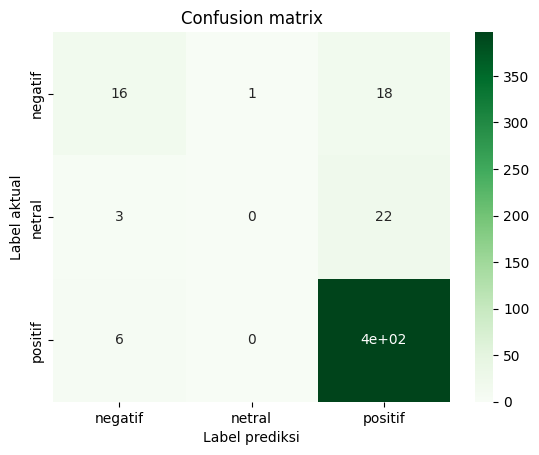

In [30]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay

ax = sn.heatmap(df_nb, cmap='Greens', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label aktual')

# CROSS VALIDATION

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelnb, x_train,y_train, cv=10)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 10 folds
print(scores.mean())

[0.85483871 0.88709677 0.87027027 0.87567568 0.87027027 0.88648649
 0.89189189 0.86486486 0.8972973  0.87567568]
0.8774367916303399


# RANDOM FOREST

In [32]:
# klasifikasi random forest
from sklearn.ensemble import RandomForestClassifier

# model_rf = RandomForestClassifier()
modelrf = RandomForestClassifier(n_estimators=100)
modelrf.fit(x_train,y_train)
predrf = modelrf.predict(x_test)
predict = pd.Series(predrf)
print(predict.to_string())

0      positif
1      positif
2      positif
3      positif
4      positif
5      positif
6      positif
7      positif
8      positif
9      positif
10     positif
11     negatif
12     positif
13     positif
14     positif
15     positif
16     positif
17     positif
18     positif
19     negatif
20     positif
21     positif
22     positif
23     positif
24     positif
25     positif
26     positif
27     positif
28     positif
29     positif
30     positif
31     positif
32     positif
33     positif
34     positif
35     positif
36     positif
37     positif
38     positif
39     positif
40     positif
41     positif
42     positif
43     positif
44     positif
45     positif
46     positif
47     positif
48     negatif
49     positif
50     positif
51     positif
52     positif
53     positif
54     positif
55     positif
56     positif
57     positif
58     positif
59     positif
60     positif
61     positif
62     positif
63     positif
64     positif
65     positif
66     pos

In [33]:
true_label = pd.Series(y_test)
print(true_label.to_string())

2731    positif
2703    positif
2794    positif
1167    positif
2600    positif
1498    positif
1281    positif
593     positif
1160    positif
647     positif
241     positif
1306    negatif
1882    positif
2280    positif
2396    positif
2315    positif
2291    positif
1230    positif
2482    positif
74      positif
2375    positif
471     positif
1451    positif
2707    positif
2269    positif
236     positif
2435    positif
1861    positif
2532    positif
1056    positif
1089    positif
230     positif
2580     netral
69      positif
1204    positif
2347    positif
1217    positif
1156    negatif
1356    positif
2309    negatif
1328    positif
553     positif
343     positif
138     positif
1054    positif
1626    positif
2307    positif
2573     netral
2021    negatif
1562    positif
216     positif
627     positif
277     positif
1258    positif
1618    positif
19      positif
1178    positif
2781    positif
1437    positif
1139    positif
1783    positif
681      netral
1168    

# CONFUSION MATRIX

In [34]:
from time import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from pandas import DataFrame

t = time()
y_pred = modelrf.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

scorerf = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % scorerf)

print(metrics.classification_report(y_test, y_pred, target_names=['negatif', 'netral', 'positif']))

columns = ['negatif','netral','positif']
cm_rf = confusion_matrix(y_test, y_pred)
df_rf = DataFrame(cm_rf, index=columns, columns=columns)

test time:  0.053s
accuracy:   0.877
              precision    recall  f1-score   support

     negatif       0.71      0.14      0.24        35
      netral       0.00      0.00      0.00        25
     positif       0.88      1.00      0.93       403

    accuracy                           0.88       463
   macro avg       0.53      0.38      0.39       463
weighted avg       0.82      0.88      0.83       463



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(50.722222222222214, 0.5, 'Label aktual')

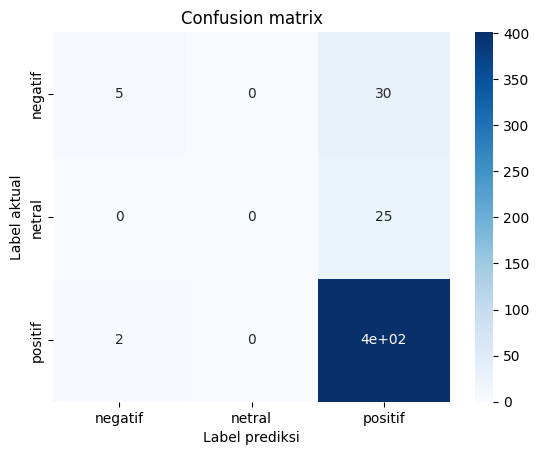

In [35]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay

ax = sn.heatmap(df_rf, cmap='Blues', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label aktual')

# CROSS VALIDATION

In [36]:
from sklearn.model_selection import cross_val_score

scoresrf = cross_val_score(modelrf, x_train,y_train, cv=10)

# Print the accuracy of each fold:
print(scoresrf)

# Print the mean accuracy of all 10 folds
print(scoresrf.mean())

[0.87634409 0.87096774 0.86486486 0.87567568 0.87567568 0.88108108
 0.88648649 0.85405405 0.8972973  0.87027027]
0.8752717233362395


# KESIMPULAN

* Analisis sentimen terhadap ulasan pelanggan Amazon mengenai berbagai
produk amazon Alexa memperoleh hasil yaitu data paling banyak berupa sentimen positif serta model yang dibangun dapat mengklasifikasikan sentimen menjadi positif, netral, dan negatif.
* Pelabelan data dilakukan secara manual dengan mengambil nilai pada kolom rating untuk memberi label positif, netral, dan negatif.
* Analisis sentimen ini menerapkan dua metode klasifikasi dengan hasil dari nilai akurasi masing-masing metode sebagai berikut.
1. naive bayes accuracy: 0.892 = 89%
2. random forest accuracy: 0.877 = 88%
* Maka, metode naive bayes lebih baik karena memiliki hasil akurasi yang
lebih tinggi daripada metode random forest.